[0 1 3 6]


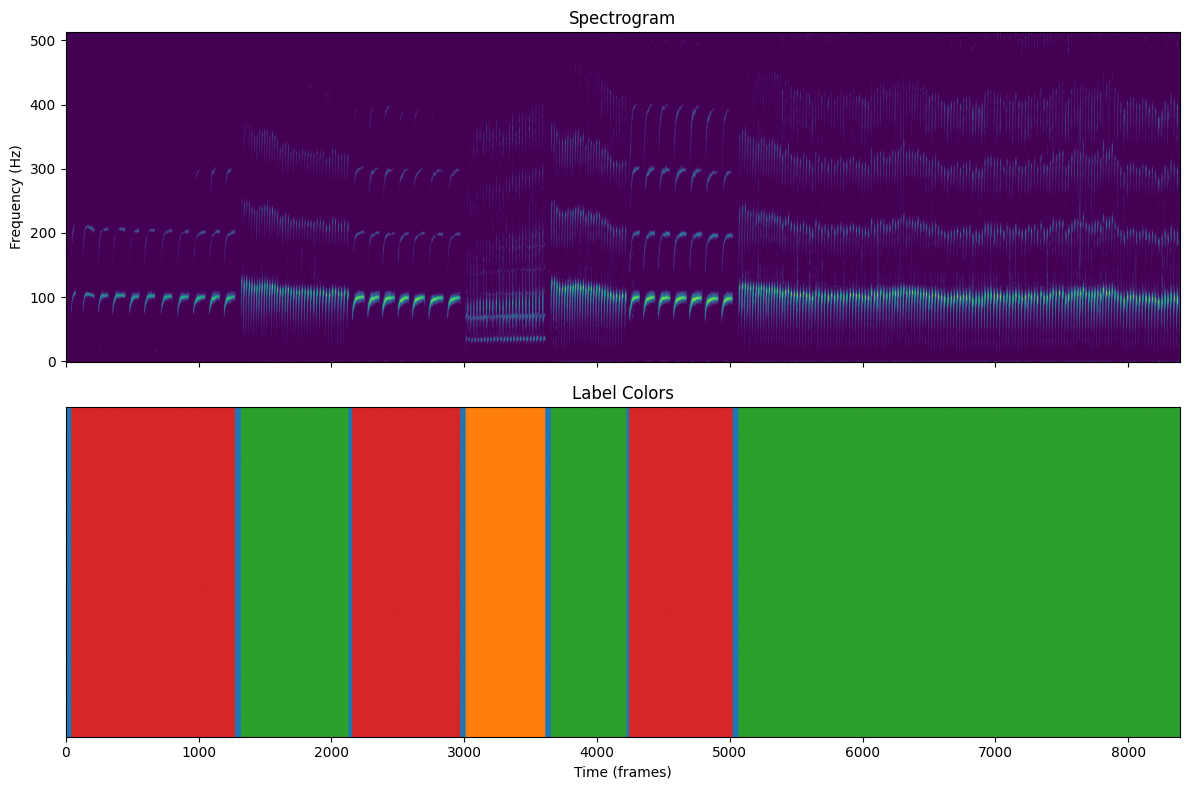

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import os
from tqdm import tqdm

# Folder containing the .npz files
folder_path = "/media/george-vengrovski/Extreme SSD/yarden_data/llb3_george_specs"

# Get all .npz files in the folder
npz_files = [f for f in os.listdir(folder_path) if f.endswith('.npz')]

# Process the first 50 files (or all if less than 50)
for file in tqdm(npz_files[:50], desc="Processing files"):
    file_path = os.path.join(folder_path, file)
    
    # Load the data from the .npz file
    data = np.load(file_path, allow_pickle=True)

    # Extract the spectrogram and labels
    spectrogram = data['s']
    labels = data['labels']

    print(f"File: {file}")
    print(f"Unique labels: {np.unique(labels)}")

    # Get the unique labels and assign each a unique color
    unique_labels = np.unique(labels)
    cmap = plt.get_cmap('tab10')  # Using a categorical colormap for distinct colors
    colors = [cmap(i) for i in range(len(unique_labels))]

    # Create a color map based on unique labels
    label_color_map = {label: color for label, color in zip(unique_labels, colors)}

    # Create an array of colors corresponding to the labels
    label_colors = [label_color_map[label] for label in labels]

    # Plot the spectrogram and the label colors
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Plot the spectrogram
    ax1.imshow(spectrogram, aspect='auto', origin='lower', cmap='viridis')
    ax1.set_ylabel('Frequency (Hz)')
    ax1.set_title(f'Spectrogram - {file}')

    # Plot the label colors
    ax2.imshow([label_colors], aspect='auto')
    ax2.set_yticks([])
    ax2.set_xlabel('Time (frames)')
    ax2.set_title('Label Colors')

    plt.tight_layout()
    plt.show()

print("Processing complete.")